# Importing Data Visualization and Manipulation Libraries

In [97]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv(r'C:\Users\ds12\College\Python-Assignments\Dataset\AmazonAppliances.csv')

df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",₹599,"₹1,245"
1,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",₹199,₹545
2,Glun Multipurpose Portable Electronic Digital ...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,₹199,₹899
3,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",₹299,"₹1,999"
4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",₹625,"₹1,400"


# Describe the dataset

In [99]:
df.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,9576,9576,9576,9576,9576,9098,9098,9214,9485
unique,8595,1,1,8853,9576,42,2037,2410,1835
top,Activated Carbon Faucet Water Filters Universa...,appliances,All Appliances,https://m.media-amazon.com/images/I/41w-je6e5b...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,4.1,1,₹499,₹999
freq,6,9576,9576,7,1,1058,327,352,799


# Data Information

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            9576 non-null   object
 1   main_category   9576 non-null   object
 2   sub_category    9576 non-null   object
 3   image           9576 non-null   object
 4   link            9576 non-null   object
 5   ratings         9098 non-null   object
 6   no_of_ratings   9098 non-null   object
 7   discount_price  9214 non-null   object
 8   actual_price    9485 non-null   object
dtypes: object(9)
memory usage: 673.4+ KB


In [101]:
# Checking for null values

df.isnull().sum().sort_values(ascending=False)

ratings           478
no_of_ratings     478
discount_price    362
actual_price       91
name                0
main_category       0
sub_category        0
image               0
link                0
dtype: int64

In [102]:
df['actual_price']  = df['actual_price'].str.strip('₹')
df['discount_price'] = df['discount_price'].str.strip('₹')
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '')
# Keeping the numeric values in the columns and replacing the rest with NaN

df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

In [103]:
# Replcaing the NaN values with the median of the column

df['ratings'].fillna(df['ratings'].median(), inplace=True)
df['no_of_ratings'].fillna(df['no_of_ratings'].median(), inplace=True)
df['actual_price'].fillna(df['actual_price'].median(), inplace=True)
df['discount_price'].fillna(df['discount_price'].median(), inplace=True)
df.drop(['image','link','main_category','sub_category'], axis=1, inplace=True)

In [104]:
df.isna().sum().sort_values(ascending=False)

name              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [105]:
# Checking for duplicates and removing them

df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [106]:
df

,name,ratings,no_of_ratings,discount_price,actual_price
0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,3.9,128941.0,599.0,650.0
1,Pigeon Polypropylene Mini Handy and Compact Ch...,4.1,274505.0,199.0,545.0
2,Glun Multipurpose Portable Electronic Digital ...,3.8,365.0,199.0,899.0
3,beatXP Kitchen Scale Multipurpose Portable Ele...,3.7,3290.0,299.0,650.0
4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,4.2,24380.0,625.0,650.0
...,...,...,...,...,...
9571,Kaizen Swimming Pool Heavy Duty In-Ground Pool...,2.9,5.0,399.0,650.0
9572,Butterfly 750 Watts 4 Jar Mixer Grinder and 90...,4.1,33.0,399.0,650.0
9573,Bajaj Bahar 150 mm Exhaust Fan (Metallic Grey),3.9,337.0,399.0,650.0
9574,Drumstone Barbeque Grill Grilling Set Machine ...,4.0,103.0,399.0,650.0


# EDA and Data Visualization

<Axes: xlabel='no_of_ratings', ylabel='name'>

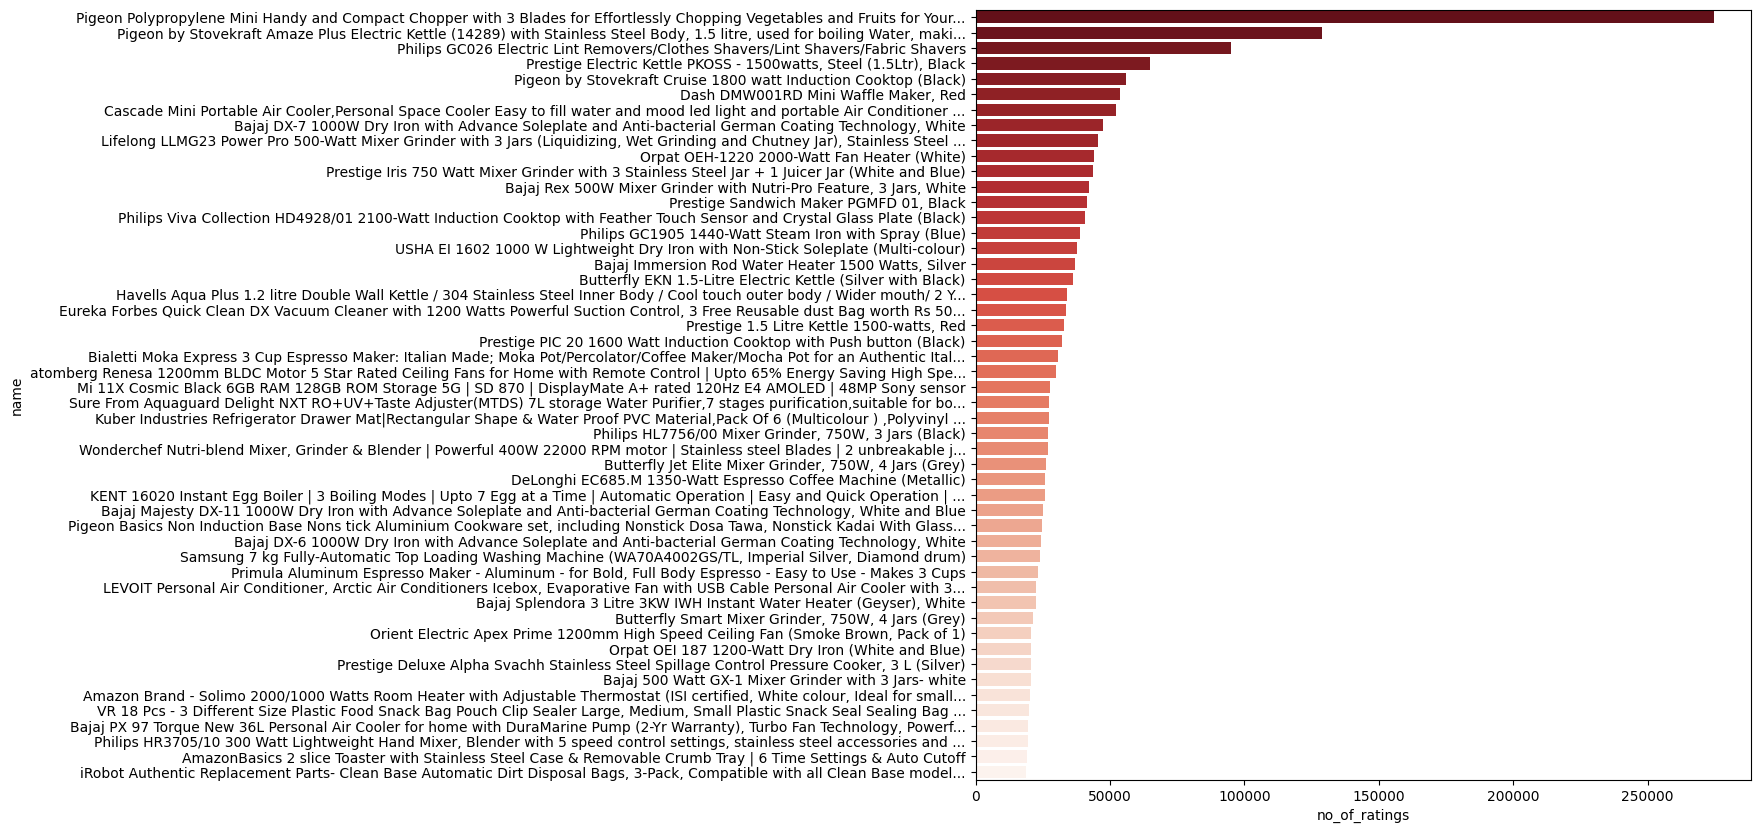

In [117]:
# Q1. Find the 50 with highest number of ratings

top_rated_products = df.sort_values(by='no_of_ratings', ascending=False)

# Plotting the top 50 products with highest number of ratings

plt.figure(figsize=(10,10))
sns.barplot(x='no_of_ratings', y='name', data=top_rated_products.head(50), palette='Reds_r')

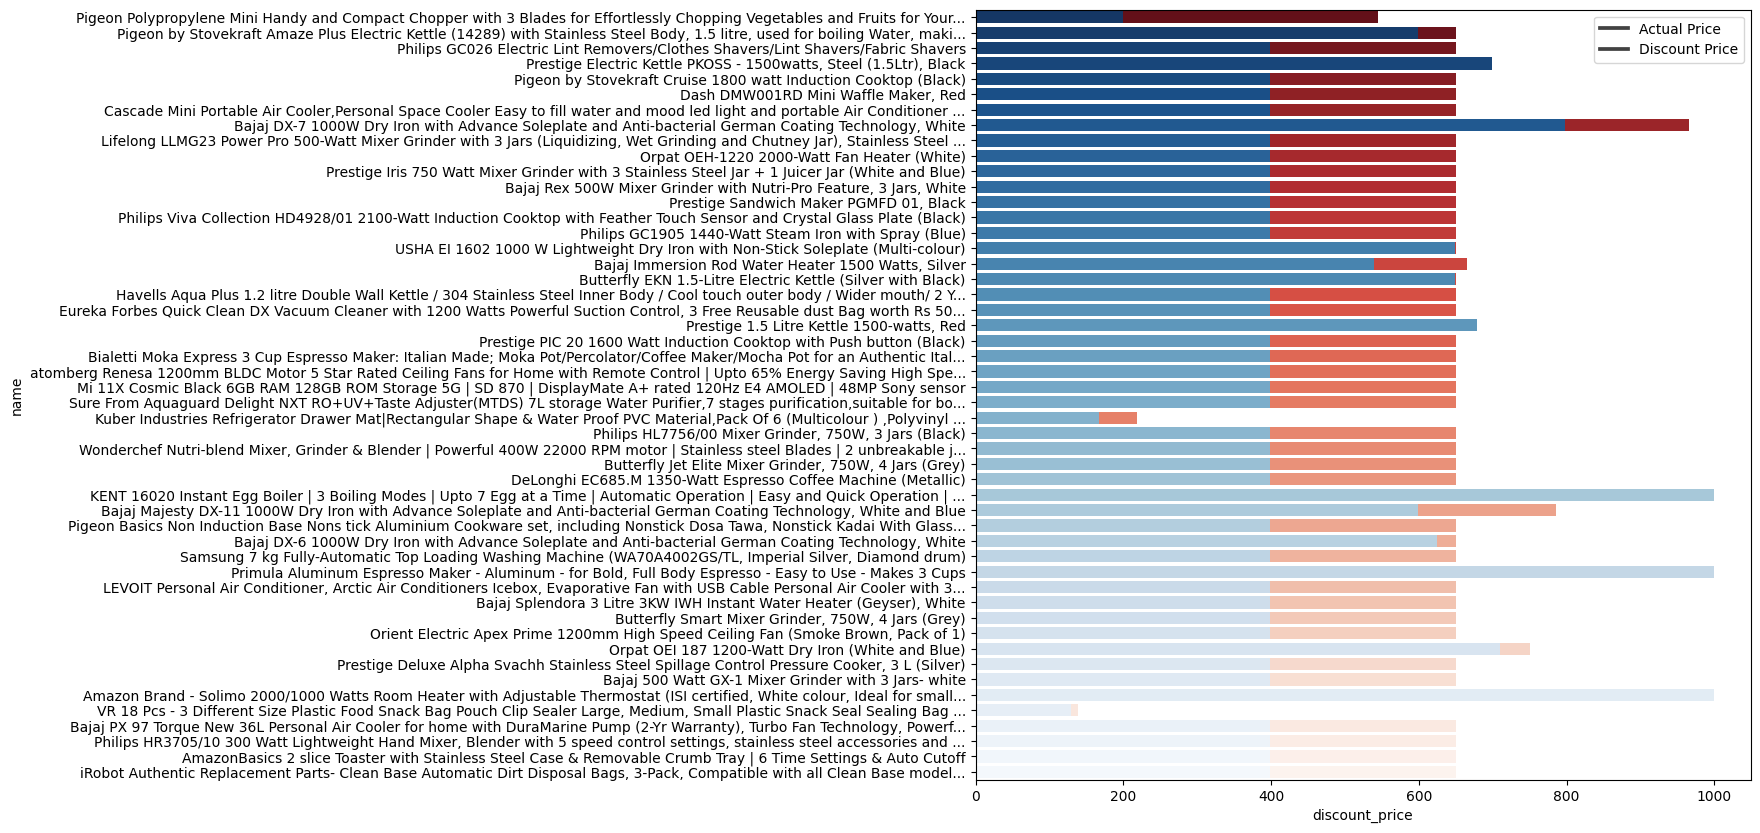

In [121]:
# Plotting the actudal price and discount price of the top 50 products

plt.figure(figsize=(10,10))
sns.barplot(x='actual_price', y='name', data=top_rated_products.head(50), palette='Reds_r')
sns.barplot(x='discount_price', y='name', data=top_rated_products.head(50), palette='Blues_r')
plt.legend(labels=['Actual Price', 'Discount Price'])


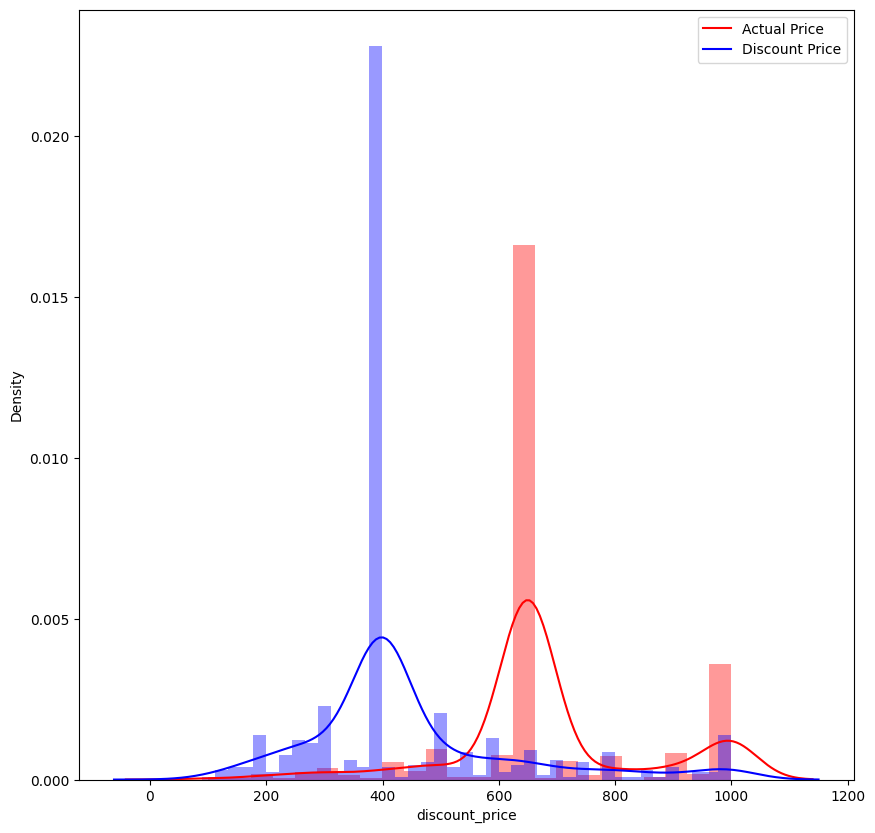

In [122]:
# Plottin the histogram of the actual price and discount price of the products with ratings greater than 4.5

plt.figure(figsize=(10,10))
sns.distplot(df[df['ratings'] > 4.5]['actual_price'], color='red')
sns.distplot(df[df['ratings'] > 4.5]['discount_price'], color='blue')
plt.legend(labels=['Actual Price', 'Discount Price'])